In [3]:
print("hello")

hello


In [4]:
import pandas as pd


In [5]:
import numpy as np

In [6]:
import seaborn as sns

In [7]:
data = pd.read_csv('Carseats.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [9]:
data['Sales']

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [10]:
mean_sales = data['Sales'].mean()
print(f'Mean Of Sales {mean_sales}')

Mean Of Sales 7.496325000000001


In [11]:
population = data.groupby('Age')['Population'].value_counts().reset_index()
ascending_oreder = population.sort_values(by='Population' , ascending=False)
ascending_oreder

,Age,Population,count
16,26,509,1
297,65,508,1
218,56,508,1
109,41,507,1
270,62,504,1
...,...,...,...
154,48,16,1
85,38,14,1
246,61,13,1
245,61,12,1


In [12]:
import matplotlib.pyplot as plt

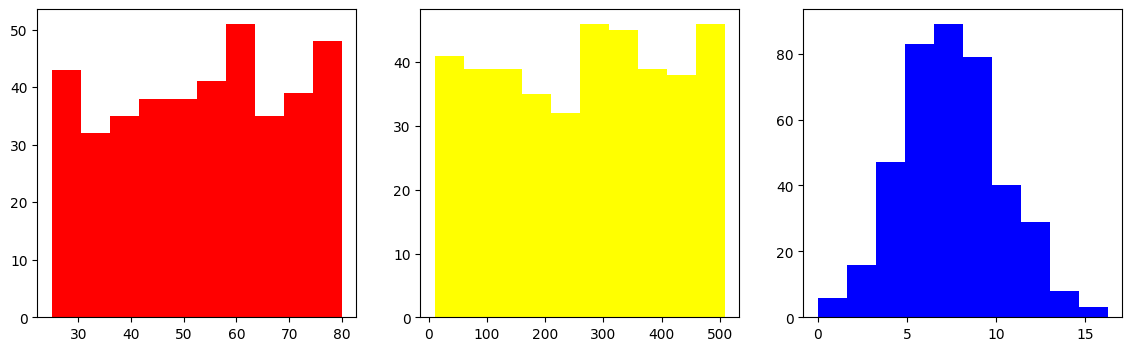

In [24]:

fig, [ax0, ax1 , ax2] = plt.subplots(1,3, figsize = (14,4))
ax0.hist(data.Age , color='red')
ax.set_label('Age distribution')

ax1.hist(data.Population , color='yellow')
ax1.set_label('Population distribution')



ax2.hist(data.Sales , color='blue')
ax2.set_label('Sales distribution')




In [26]:
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [28]:
data[['Education' , 'Urban']]

,Education,Urban
0,17,Yes
1,10,Yes
2,12,Yes
3,14,Yes
4,13,Yes
...,...,...
395,14,Yes
396,11,No
397,18,Yes
398,12,Yes


In [64]:
next_set = data[data['Age'] > 11]
count_set = next_set['Urban'].value_counts().reset_index()

In [66]:
count_set

,Urban,count
0,Yes,282
1,No,118


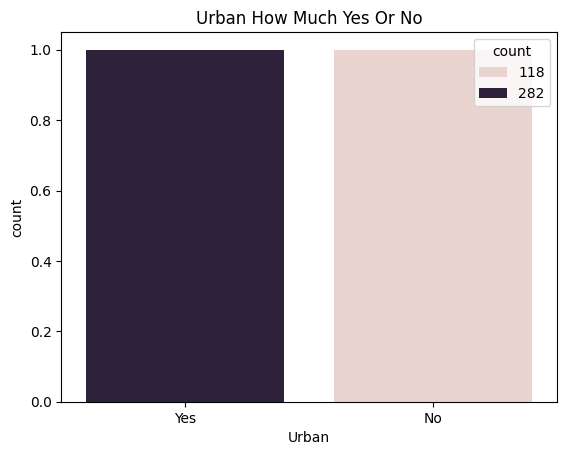

In [68]:
sns.countplot(data=count_set , x='Urban' , hue='count')
plt.title('Urban How Much Yes Or No')
plt.show()

In [69]:
data['Age'].max()

np.int64(80)

In [70]:
data['Age'].min()

np.int64(25)

In [73]:
data.groupby('Urban')['Age'].min().reset_index()

,Urban,Age
0,No,25
1,Yes,25


In [74]:
data['Age']

0      42
1      65
2      59
3      55
4      38
       ..
395    33
396    55
397    40
398    50
399    49
Name: Age, Length: 400, dtype: int64

In [76]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [77]:
data.groupby('Age')['US'].value_counts().reset_index()

,Age,US,count
0,25,No,5
1,25,Yes,4
2,26,No,4
3,26,Yes,4
4,27,No,3
...,...,...,...
101,78,No,1
102,79,No,4
103,79,Yes,4
104,80,No,7


In [84]:
eduction = data.groupby('Education')['US'].value_counts().reset_index()
eduction


,Education,US,count
0,10,Yes,37
1,10,No,11
2,11,Yes,33
3,11,No,15
4,12,Yes,31
5,12,No,18
6,13,Yes,25
7,13,No,18
8,14,Yes,27
9,14,No,13


<Axes: xlabel='Education', ylabel='Count'>

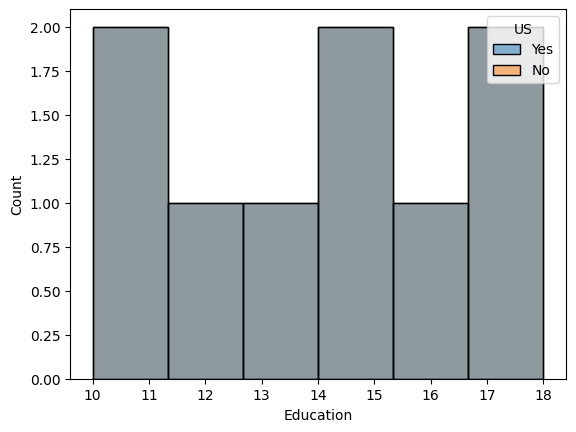

In [86]:
sns.histplot(data=eduction , x='Education' , hue='US')

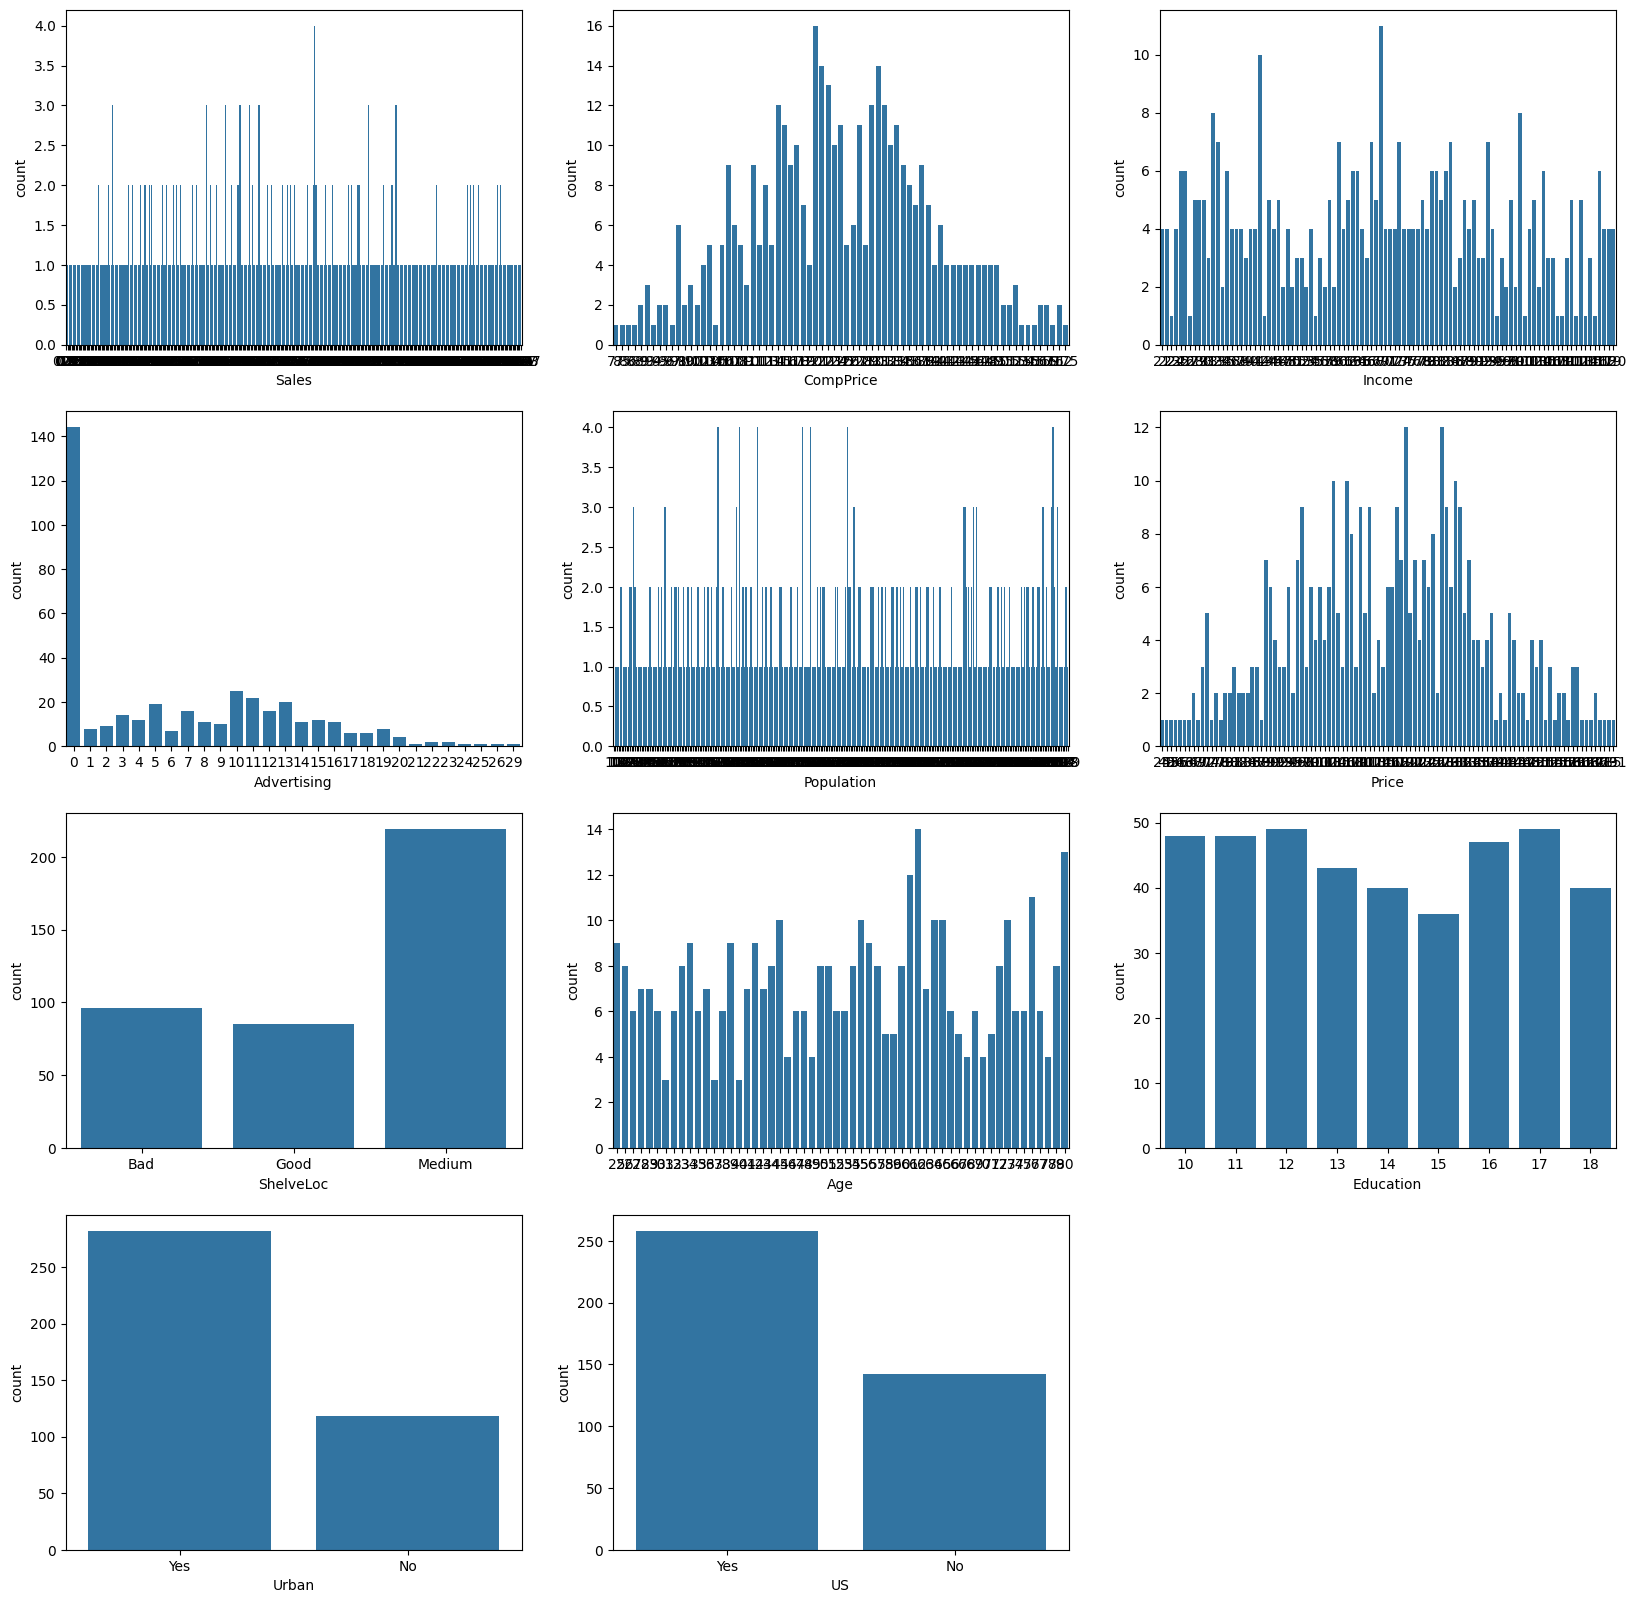

In [87]:
cat_col = ['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
fig = plt.figure(figsize=(20,20))
for i,col in enumerate(cat_col):
    ax = fig.add_subplot(4 , 3 , i+1)
    sns.countplot(data=data , x=col )

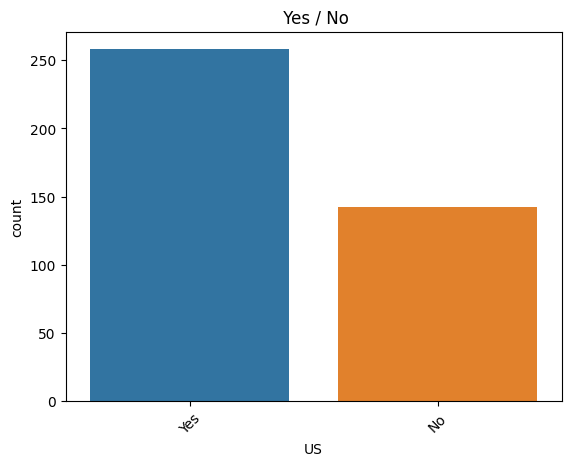

In [95]:
for i in cat_col[:-1]:
    sns.countplot(data=data , x=col , hue='US')
    plt.xticks(rotation = 45)
    plt.title(f" Yes / No")

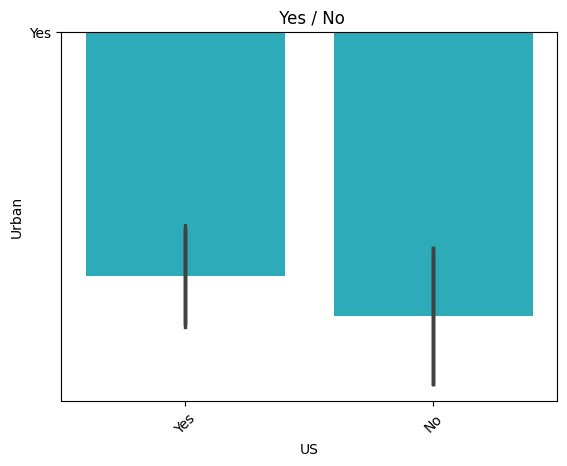

In [94]:
for i in cat_col[:-1]:
    sns.barplot(data=data , x=col , y='Urban')
    plt.xticks(rotation = 45)
    plt.title(f" Yes / No")

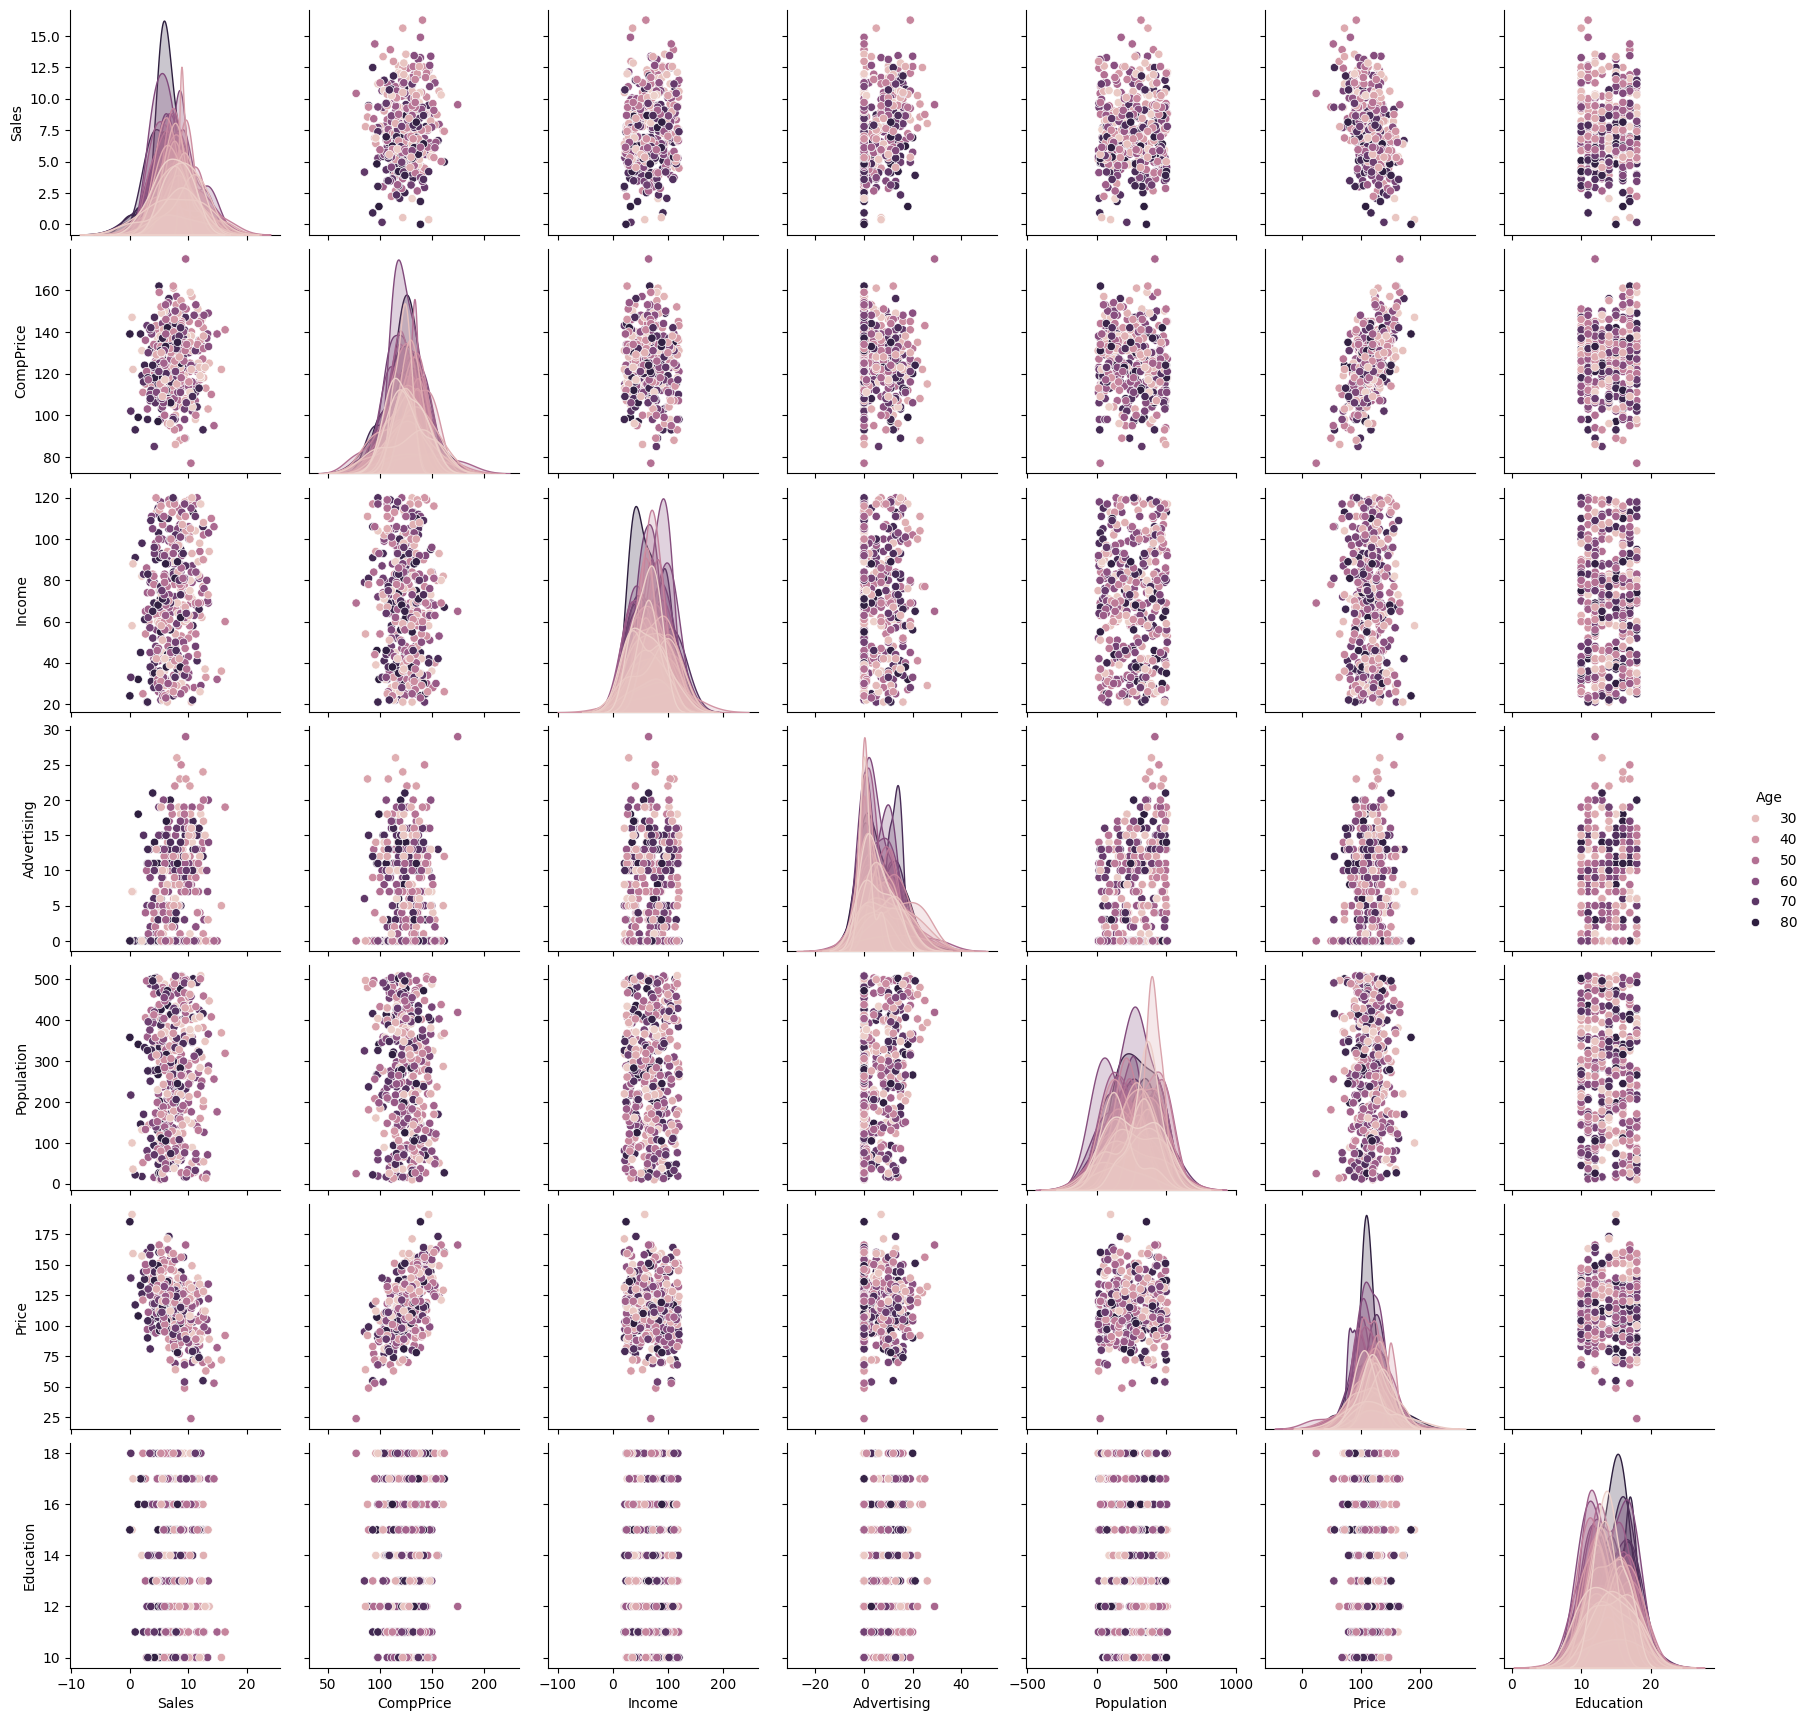

In [96]:
sns.pairplot(data , hue = 'Age')

In [97]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<Axes: >

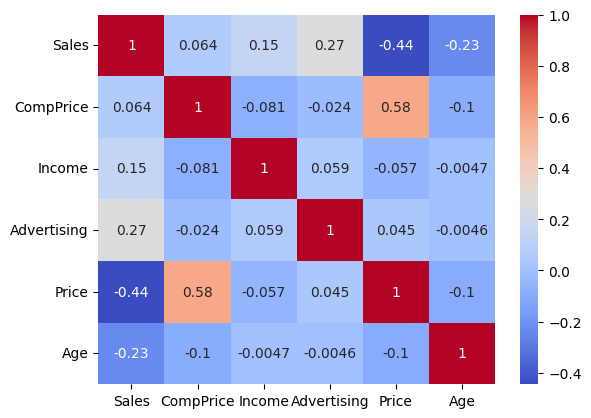

In [98]:
numeric_cols = ['Sales' , 'CompPrice' , 'Income', 'Advertising' , 'Price' , 'Age']

corr = data[numeric_cols].corr()
plt.Figure(figsize=(10,6))
sns.heatmap(corr , annot=True , cmap='coolwarm')

In [183]:
x = data.drop('Sales' , axis = 1)
y= data['Sales']

In [187]:
x = pd.get_dummies(x).astype(int)
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [182]:
from sklearn.tree import DecisionTreeRegressor
hi = DecisionTreeRegressor()
hi

DecisionTreeRegressor()

In [188]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [190]:
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
258,108,38,0,251,81,72,14,1,0,0,1,0,1,0
177,138,72,0,148,94,27,17,0,0,1,0,1,0,1
119,130,94,8,137,128,64,12,0,0,1,0,1,0,1
194,112,98,18,481,128,45,11,0,0,1,0,1,0,1
229,98,104,0,404,72,27,18,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,58,17,0,0,1,1,0,0,1
106,102,33,0,217,139,70,18,0,0,1,1,0,1,0
270,119,26,0,284,89,26,10,0,1,0,0,1,1,0
348,132,102,20,459,107,49,11,0,1,0,0,1,0,1


In [192]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [193]:
model = DecisionTreeRegressor()
model.fit(X_train , y_train)

DecisionTreeRegressor()

In [195]:
x_pred = model.predict(X_test)
x_pred

array([ 2.99,  4.47, 10.5 ,  4.88,  9.4 ,  4.88, 11.99,  8.01, 11.93,
       11.54,  6.2 ,  9.4 ,  9.4 ,  7.77,  3.58,  7.56, 10.61, 12.57,
        6.54,  6.97,  7.71,  4.9 ,  7.96,  3.62,  5.99,  9.62,  6.42,
        7.63,  6.92,  3.63, 13.39, 10.96,  5.68,  4.19,  8.89,  6.87,
        5.31,  8.01, 10.26,  4.15,  4.47,  6.5 ,  9.33, 11.28,  9.16,
        6.71,  7.38,  9.33,  6.97,  6.87, 11.07,  8.78,  9.45, 10.62,
        8.55,  3.15,  5.47,  8.21, 11.96,  9.09,  7.52,  6.67,  6.97,
        2.93,  8.31,  6.87, 12.85,  9.45,  7.68, 10.26,  6.5 ,  6.97,
       11.18,  4.15,  6.97,  3.91, 10.06,  8.01,  4.1 ,  9.53,  9.4 ,
       14.37,  3.15,  3.58,  8.31,  5.55,  6.59,  7.56,  5.07,  5.3 ,
        9.39,  7.23,  5.55, 10.1 ,  4.47,  6.67,  7.3 ,  7.71,  4.42,
        7.63,  4.47,  7.37,  7.36,  9.4 ,  7.49, 12.57,  8.55,  7.95,
       10.61,  9.4 ,  6.23,  8.8 , 15.63,  5.73,  5.94,  7.68,  7.63,
        9.62,  9.39,  8.77,  8.68,  9.95, 12.13, 10.26,  6.8 ,  7.77,
       11.18,  6.59,

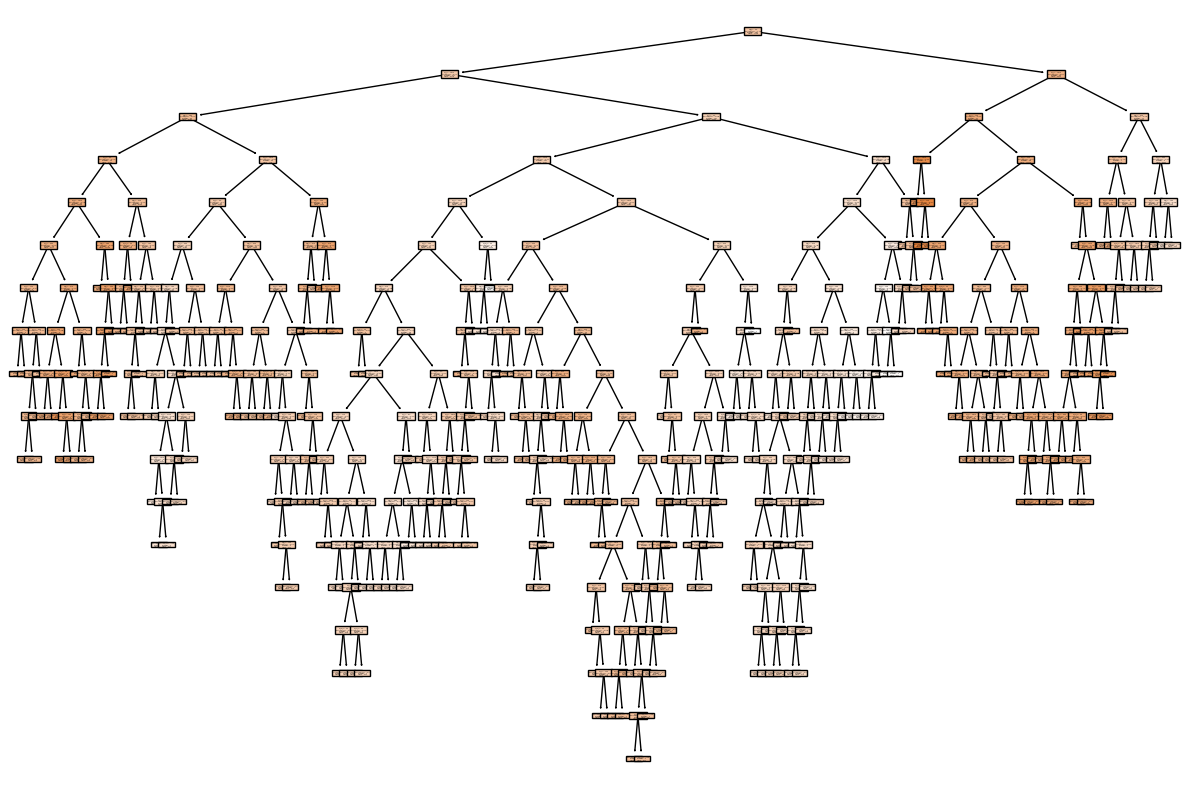

In [198]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model , filled=True)
plt.show()